In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)


Matplotlib is building the font cache; this may take a moment.


In [5]:
df = pd.read_csv("../data/raw/studentsPerformance.csv")
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Every score is having mean around 65-69 and std 15-16

In [11]:
df.select_dtypes(include='object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [12]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['total_score'] / 3

In [13]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


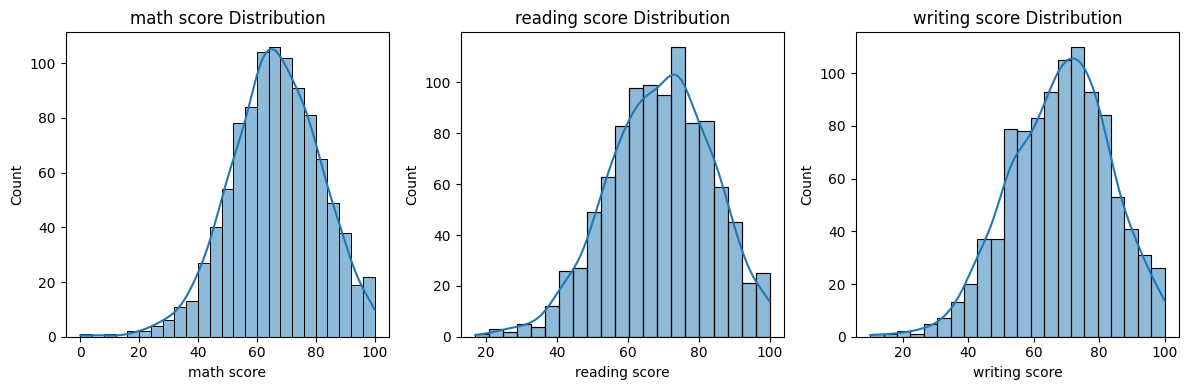

In [17]:
score_cols = ["math score", "reading score", "writing score"]

plt.figure(figsize=(12,4))
for i, col in enumerate(score_cols, 1):
    plt.subplot(1,3,i)
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")

plt.tight_layout()
plt.show()


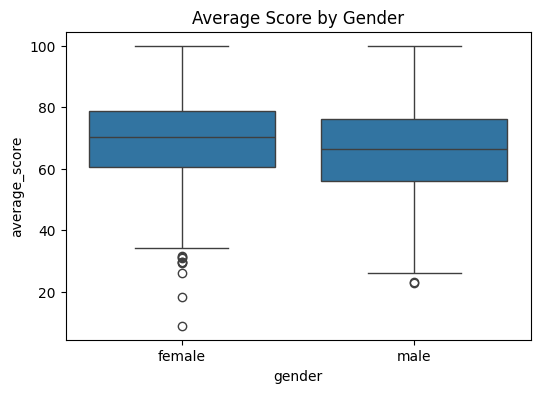

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(x="gender", y="average_score", data=df)
plt.title("Average Score by Gender")
plt.show()


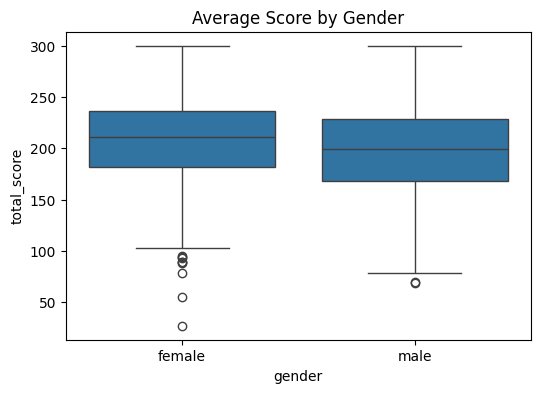

In [19]:
plt.figure(figsize=(6,4))
sns.boxplot(x="gender", y="total_score", data=df)
plt.title("Average Score by Gender")
plt.show()


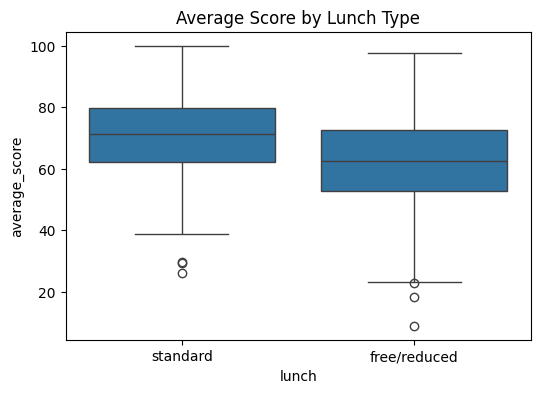

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(x="lunch", y="average_score", data=df)
plt.title("Average Score by Lunch Type")
plt.show()


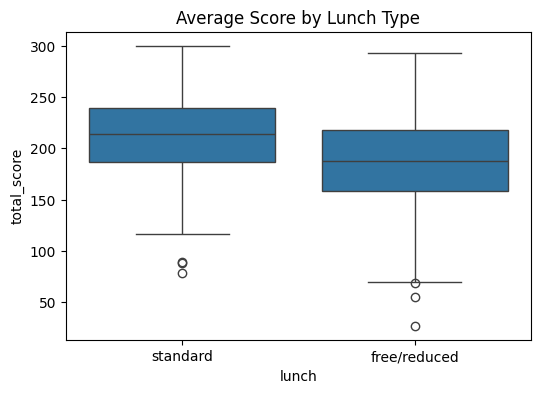

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(x="lunch", y="total_score", data=df)
plt.title("Average Score by Lunch Type")
plt.show()


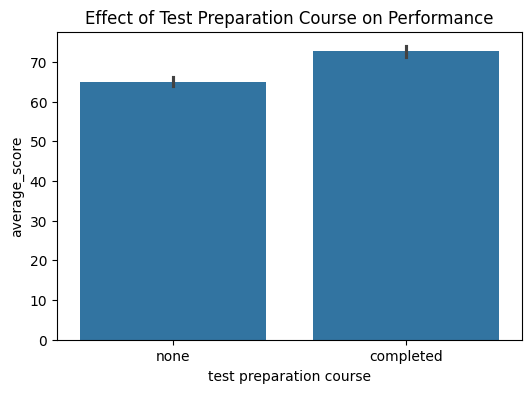

In [22]:
plt.figure(figsize=(6,4))
sns.barplot(
    x="test preparation course",
    y="average_score",
    data=df,
    estimator=np.mean
)
plt.title("Effect of Test Preparation Course on Performance")
plt.show()


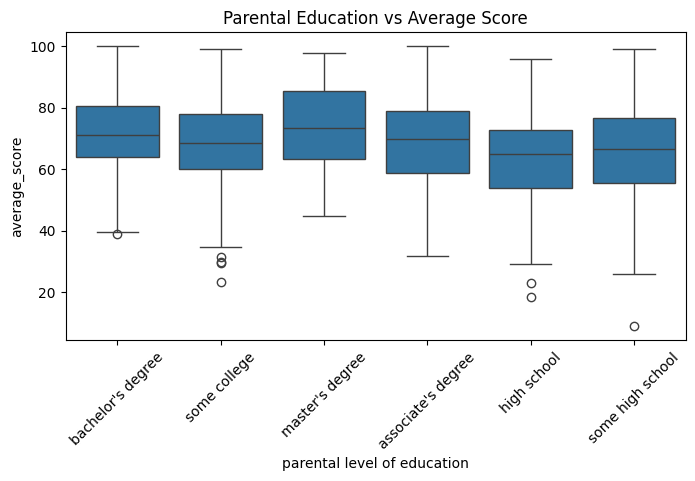

In [23]:
plt.figure(figsize=(8,4))
sns.boxplot(
    x="parental level of education",
    y="average_score",
    data=df
)
plt.xticks(rotation=45)
plt.title("Parental Education vs Average Score")
plt.show()


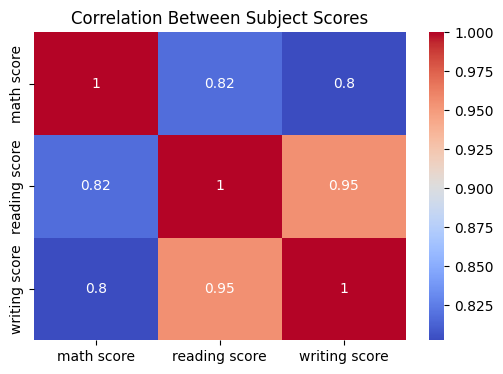

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[["math score", "reading score", "writing score"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Between Subject Scores")
plt.show()


## EDA Summary

- Score distributions are approximately normal.
- Test preparation course and lunch type show noticeable impact on performance.
- Reading and writing scores are strongly correlated.
